In [1]:
import chess
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

hj_df = pd.read_csv('/home/jovyan/chessLLM/searchless_chess/data/lichess_10k.csv')
dm_df = pd.read_csv('/home/jovyan/chessLLM/searchless_chess/data/puzzles.csv')
dy_df = pd.read_csv('/home/jovyan/chessLLM/searchless_chess/data/lichess_db_puzzle.csv')

In [5]:
hj_df

,id,rating,board_fen,board_str,prev_moves_uci,prev_moves_san,prev_moves_uci_numbering,prev_moves_san_numbering,prev_moves_uci_numbering_space,prev_moves_san_numbering_space,legal_moves_uci,legal_moves_san,next_move_uci,next_move_san
0,00MTG,669,4r1k1/2p1qpp1/3p4/1p1P2PQ/1P6/3R3P/2PBrb2/5RK1...,. . . . r . k . \n . . p . q p p . \n . . . p ...,e2e4 e7e5 g1f3 b8c6 f1c4 g8f6 b1c3 f8e7 e1g1 e...,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Be7 O-O O-O h3 h6 d4...,1.e2e4 e7e5 2.g1f3 b8c6 3.f1c4 g8f6 4.b1c3 f8e...,1.e4 e5 2.Nf3 Nc6 3.Bc4 Nf6 4.Nc3 Be7 5.O-O O-...,1. e2e4 e7e5 2. g1f3 b8c6 3. f1c4 g8f6 4. b1c3...,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Be7 5. O...,g1h2 g1g2 g1h1 f1f2,Kh2 Kg2 Kh1 Rxf2,f1f2,Rxf2
1,00MTG,669,4r1k1/2p1qpp1/3p4/1p1P2PQ/1P6/3R3P/2PBrR2/6K1 ...,. . . . r . k . \n . . p . q p p . \n . . . p ...,e2e4 e7e5 g1f3 b8c6 f1c4 g8f6 b1c3 f8e7 e1g1 e...,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Be7 O-O O-O h3 h6 d4...,1.e2e4 e7e5 2.g1f3 b8c6 3.f1c4 g8f6 4.b1c3 f8e...,1.e4 e5 2.Nf3 Nc6 3.Bc4 Nf6 4.Nc3 Be7 5.O-O O-...,1. e2e4 e7e5 2. g1f3 b8c6 3. f1c4 g8f6 4. b1c3...,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Be7 5. O...,g8f8 e8f8 e8d8 e8c8 e8b8 e8a8 e7f8 e7d8 e7d7 e...,Kf8 Rf8 Rd8 Rc8 Rb8 Ra8 Qf8 Qd8 Qd7 Qf6 Qe6 Qx...,e2f2,Rxf2
2,00MTG,669,4r1k1/2p1qpp1/3p4/1p1P2PQ/1P6/3R3P/2PB1r2/6K1 ...,. . . . r . k . \n . . p . q p p . \n . . . p ...,e2e4 e7e5 g1f3 b8c6 f1c4 g8f6 b1c3 f8e7 e1g1 e...,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Be7 O-O O-O h3 h6 d4...,1.e2e4 e7e5 2.g1f3 b8c6 3.f1c4 g8f6 4.b1c3 f8e...,1.e4 e5 2.Nf3 Nc6 3.Bc4 Nf6 4.Nc3 Be7 5.O-O O-...,1. e2e4 e7e5 2. g1f3 b8c6 3. f1c4 g8f6 4. b1c3...,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Be7 5. O...,h5h8 h5h7 h5f7 h5h6 h5g6 h5h4 h5g4 h5f3 h5e2 h...,Qh8+ Qh7+ Qxf7+ Qh6 Qg6 Qh4 Qg4 Qf3 Qe2 Qd1 Rd...,g1f2,Kxf2
3,00Msq,1932,r4k2/1pp2Bp1/5n1p/1q2N3/3P4/7P/5PP1/4Q1K1 w - ...,r . . . . k . . \n . p p . . B p . \n . . . . ...,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 c5b6 e1g1 d...,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Bb6 O-O d6 b4 h6 a4 a...,1.e2e4 e7e5 2.g1f3 b8c6 3.f1c4 f8c5 4.c2c3 c5b...,1.e4 e5 2.Nf3 Nc6 3.Bc4 Bc5 4.c3 Bb6 5.O-O d6 ...,1. e2e4 e7e5 2. g1f3 b8c6 3. f1c4 f8c5 4. c2c3...,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 Bb6 5. O-...,f7g8 f7e8 f7g6 f7e6 f7h5 f7d5 f7c4 f7b3 f7a2 e...,Bg8 Be8 Bg6 Be6 Bh5 Bd5 Bc4 Bb3 Ba2 Nd7+ Ng6+ ...,f7c4,Bc4
4,00Msq,1932,r4k2/1pp3p1/5n1p/1q2N3/2BP4/7P/5PP1/4Q1K1 b - ...,r . . . . k . . \n . p p . . . p . \n . . . . ...,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 c5b6 e1g1 d...,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Bb6 O-O d6 b4 h6 a4 a...,1.e2e4 e7e5 2.g1f3 b8c6 3.f1c4 f8c5 4.c2c3 c5b...,1.e4 e5 2.Nf3 Nc6 3.Bc4 Bc5 4.c3 Bb6 5.O-O d6 ...,1. e2e4 e7e5 2. g1f3 b8c6 3. f1c4 f8c5 4. c2c3...,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 Bb6 5. O-...,f8e8 f8e7 a8e8 a8d8 a8c8 a8b8 a8a7 a8a6 a8a5 a...,Ke8 Ke7 Re8 Rd8 Rc8 Rb8 Ra7 Ra6 Ra5 Ra4 Ra3 Ra...,b5c4,Qxc4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,UgBF5,1548,6k1/8/3R2p1/4q1Np/7P/8/5PPK/8 w - - 3 37,. . . . . . k . \n . . . . . . . . \n . . . R ...,b2b3 g8f6 g1f3 g7g6 c1b2 f8g7 b1c3 e8g8 d2d4 d...,b3 Nf6 Nf3 g6 Bb2 Bg7 Nc3 O-O d4 d6 e4 Re8 Bd3...,1.b2b3 g8f6 2.g1f3 g7g6 3.c1b2 f8g7 4.b1c3 e8g...,1.b3 Nf6 2.Nf3 g6 3.Bb2 Bg7 4.Nc3 O-O 5.d4 d6 ...,1. b2b3 g8f6 2. g1f3 g7g6 3. c1b2 f8g7 4. b1c3...,1. b3 Nf6 2. Nf3 g6 3. Bb2 Bg7 4. Nc3 O-O 5. d...,h2h3 h2h1 h2g1 g2g3 f2f4,Kh3 Kh1 Kg1 g3 f4,g2g3,g3
36484,UgBF5,1548,6k1/8/3R2p1/4q1Np/7P/6P1/5P1K/8 b - - 0 37,. . . . . . k . \n . . . . . . . . \n . . . R ...,b2b3 g8f6 g1f3 g7g6 c1b2 f8g7 b1c3 e8g8 d2d4 d...,b3 Nf6 Nf3 g6 Bb2 Bg7 Nc3 O-O d4 d6 e4 Re8 Bd3...,1.b2b3 g8f6 2.g1f3 g7g6 3.c1b2 f8g7 4.b1c3 e8g...,1.b3 Nf6 2.Nf3 g6 3.Bb2 Bg7 4.Nc3 O-O 5.d4 d6 ...,1. b2b3 g8f6 2. g1f3 g7g6 3. c1b2 f8g7 4. b1c3...,1. b3 Nf6 2. Nf3 g6 3. Bb2 Bg7 4. Nc3 O-O 5. d...,g8h8 g8f8 g8g7 e5h8 e5e8 e5g7 e5e7 e5f6 e5e6 e...,Kh8 Kf8 Kg7 Qh8 Qe8 Qg7 Qe7 Qf6 Qe6 Qxd6 Qxg5 ...,e5d6,Qxd6
36485,UgCb9,1452,8/6p1/1pp1k3/p5P1/P1KP3P/8/8/8 w - - 1 37,. . . . . . . . \n . . . . . . p . \n . p p . ...,g1f3 d7d5 d2d4 b8c6 c2c4 c8f5 b1c3 e7e6 c4d5 e...,Nf3 d5 d4 Nc6 c4 Bf5 

In [6]:
dm_df

,PuzzleId,Rating,PGN,Solution,FEN,Moves
0,00MTG,669,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Be7 5. O...,Bf2+ Rxf2 Rxf2 Kxf2,4r1k1/2p1qpp1/3p4/1p1P2PQ/1P5b/3R3P/2PBr3/5RK1...,h4f2 f1f2 e2f2 g1f2
1,00Msq,1932,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 Bb6 5. O-...,Kf8 Bc4 Qxc4 Nxc4,r5k1/1pp2Bp1/5n1p/1q2N3/3P4/7P/5PP1/4Q1K1 b - ...,g8f8 f7c4 b5c4 e5c4
2,00Pbs,2106,1. d4 Nf6 2. Nf3 d5 3. g3 c5 4. Bg2 e6 5. c3 N...,Qxe7 Bg2+ Ke1 Nhf3#,3r1rk1/Q3qppp/8/1ppb4/2Pn1B1n/2N3P1/PP3P2/R2R1...,a7e7 d5g2 f1e1 h4f3
3,00SIq,1880,1. e4 e6 2. Nf3 d5 3. exd5 exd5 4. Nc3 Nf6 5. ...,Rxf7 Qxf7 Qxf7+ Kxf7,r3r1k1/1Q3ppp/8/pP6/2q5/7P/3R2P1/5R1K w - - 0 30,f1f7 c4f7 b7f7 g8f7
4,00j6z,2225,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bc5 5. d...,Nxd5 Rxg4+ Qg5+ Rxg5+,r4r2/ppp1qpk1/3p1n2/2bNp3/2B1P1pR/3P2B1/PPPK1P...,f6d5 h4g4 e7g5 g4g5
...,...,...,...,...,...,...
9995,UfHwH,1284,1. e4 c5 2. Nf3 d6 3. Nc3 e6 4. d4 cxd4 5. Nxd...,Bxf3 Qh7#,r2q1rk1/1p2bpp1/p2p3p/3P4/3pQ1bP/3B1N2/PPP2PP1...,g4f3 e4h7
9996,UfXu1,1163,1. e4 e5 2. Nf3 d6 3. d4 Nd7 4. dxe5 Nxe5 5. N...,Bxe5 Rxd2+ Rxd2 Bxe5,3r4/2b1kr2/2p1p2p/p3n1p1/1p2P3/1P3PP1/PBPR2KP/...,b2e5 d8d2 d1d2 c7e5
9997,UgBAM,1158,1. e4 c5 2. Nf3 g6 3. g3 Bg7 4. Bg2 Nc6 5. O-O...,Qe5 Nf3+ Kf1 Nxe5,4Q3/8/5Np1/1p3nP1/1k1n4/8/5P2/6K1 w - - 3 51,e8e5 d4f3 g1f1 f3e5
9998,UgBF5,1548,1. b3 Nf6 2. Nf3 g6 3. Bb2 Bg7 4. Nc3 O-O 5. d...,Rxd6 Qa1+ Kh2 Qe5+ g3 Qxd6,6k1/8/3p1Rp1/6Np/q6P/8/5PP1/6K1 w - - 0 35,f6d6 a4a1 g1h2 a1e5 g2g3 e5d6


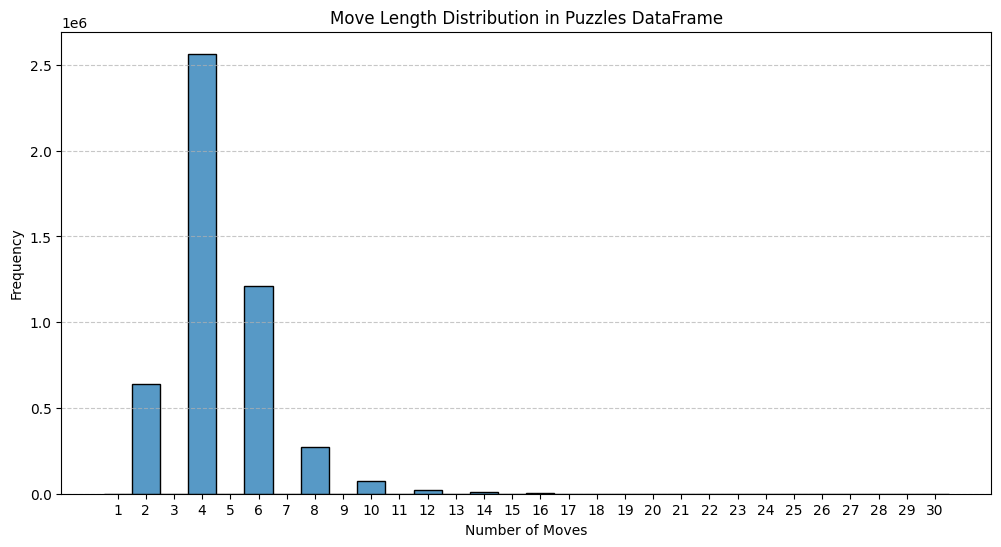

In [2]:
# But first, I want to analyze the length histogram of the moves in dy_df

def plot_move_length_histogram(df, title):
    # Get the lengths of the moves
    move_lengths = df['Moves'].str.split().apply(len)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Create the histogram with explicit bin edges
    bin_edges = np.arange(0.5, max(move_lengths) + 1.5)
    sns.histplot(move_lengths, bins=bin_edges, kde=False)
    
    plt.title(title)
    plt.xlabel('Number of Moves')
    plt.ylabel('Frequency')
    
    # Set the xticks to be at whole numbers
    plt.xticks(np.arange(1, max(move_lengths) + 1))
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_move_length_histogram(dy_df, "Move Length Distribution in Puzzles DataFrame")


#### First lets make sure that hojoon didn't make any mistakes

Check that all questions are done after the "first" move is applied.
 
First move is actually the opponent's move. I think that this is stupid, but that is how they made it ... so whatever

In [8]:
### Well before that, lets first figure out how to parse out the csv file

def group_by_id(df, id_value):
    # Filter the DataFrame to include only the rows with the specified id
    group = df[df['id'] == id_value]
    
    # Get the board_fen from the first row
    board_fen = group.iloc[0]['board_fen']
    
    # Gather all the next move UCI and SAN in lists
    next_moves_uci = group['next_move_uci'].tolist()
    next_moves_san = group['next_move_san'].tolist()
    
    return board_fen, next_moves_uci, next_moves_san

# Example query for a specific id:
board_fen, moves_uci, moves_san = group_by_id(hj_df, "UgBAM")

# Display the result
print("Board FEN:", board_fen)
print("Next Moves (UCI):", moves_uci)
print("Next Moves (SAN):", moves_san)



Board FEN: 8/8/5Np1/1p2QnP1/1k1n4/8/5P2/6K1 b - - 4 51
Next Moves (UCI): ['d4f3', 'g1f1', 'f3e5']
Next Moves (SAN): ['Nf3+', 'Kf1', 'Nxe5']


In [13]:
hj_df[hj_df["id"] == puzzle_id]

,id,rating,board_fen,board_str,prev_moves_uci,prev_moves_san,prev_moves_uci_numbering,prev_moves_san_numbering,prev_moves_uci_numbering_space,prev_moves_san_numbering_space,legal_moves_uci,legal_moves_san,next_move_uci,next_move_san
16047,DBTQv,1262,1k2rr2/p2q4/1p4n1/2pP3Q/2Pp4/PP1P1n1P/1B2R3/2K...,. k . . r r . . \n p . . q . . . . \n . p . . ...,h2h3 d7d5 a2a3 e7e5 g2g3 c7c5 b2b3 b8c6 f1g2 c...,h3 d5 a3 e5 g3 c5 b3 Nc6 Bg2 Be6 Bb2 f6 d3 Qd7...,1.h2h3 d7d5 2.a2a3 e7e5 3.g2g3 c7c5 4.b2b3 b8c...,1.h3 d5 2.a3 e5 3.g3 c5 4.b3 Nc6 5.Bg2 Be6 6.B...,1. h2h3 d7d5 2. a2a3 e7e5 3. g2g3 c7c5 4. b2b3...,1. h3 d5 2. a3 e5 3. g3 c5 4. b3 Nc6 5. Bg2 Be...,h5h8 h5h7 h5h6 h5g6 h5g5 h5f5 h5e5 h5h4 h5g4 h...,Qh8 Qh7 Qh6 Qxg6 Qg5 Qf5 Qe5+ Qh4 Qg4 Qxf3 Rxe...,e2e8,Rxe8+
16048,DBTQv,1262,1k2Rr2/p2q4/1p4n1/2pP3Q/2Pp4/PP1P1n1P/1B6/2K1R...,. k . . R r . . \n p . . q . . . . \n . p . . ...,h2h3 d7d5 a2a3 e7e5 g2g3 c7c5 b2b3 b8c6 f1g2 c...,h3 d5 a3 e5 g3 c5 b3 Nc6 Bg2 Be6 Bb2 f6 d3 Qd7...,1.h2h3 d7d5 2.a2a3 e7e5 3.g2g3 c7c5 4.b2b3 b8c...,1.h3 d5 2.a3 e5 3.g3 c5 4.b3 Nc6 5.Bg2 Be6 6.B...,1. h2h3 d7d5 2. a2a3 e7e5 3. g2g3 c7c5 4. b2b3...,1. h3 d5 2. a3 e5 3. g3 c5 4. b3 Nc6 5. Bg2 Be...,b8c7 b8b7 f8e8 d7e8 d7d8 d7c8,Kc7 Kb7 Rxe8 Qxe8 Qd8 Qc8,f8e8,Rxe8
16049,DBTQv,1262,1k2r3/p2q4/1p4n1/2pP3Q/2Pp4/PP1P1n1P/1B6/2K1R3...,. k . . r . . . \n p . . q . . . . \n . p . . ...,h2h3 d7d5 a2a3 e7e5 g2g3 c7c5 b2b3 b8c6 f1g2 c...,h3 d5 a3 e5 g3 c5 b3 Nc6 Bg2 Be6 Bb2 f6 d3 Qd7...,1.h2h3 d7d5 2.a2a3 e7e5 3.g2g3 c7c5 4.b2b3 b8c...,1.h3 d5 2.a3 e5 3.g3 c5 4.b3 Nc6 5.Bg2 Be6 6.B...,1. h2h3 d7d5 2. a2a3 e7e5 3. g2g3 c7c5 4. b2b3...,1. h3 d5 2. a3 e5 3. g3 c5 4. b3 Nc6 5. Bg2 Be...,h5h8 h5h7 h5h6 h5g6 h5g5 h5f5 h5e5 h5h4 h5g4 h...,Qh8 Qh7 Qh6 Qxg6 Qg5 Qf5 Qe5+ Qh4 Qg4 Qxf3 Bxd...,e1e8,Rxe8+
16050,DBTQv,1262,1k2R3/p2q4/1p4n1/2pP3Q/2Pp4/PP1P1n1P/1B6/2K5 b...,. k . . R . . . \n p . . q . . . . \n . p . . ...,h2h3 d7d5 a2a3 e7e5 g2g3 c7c5 b2b3 b8c6 f1g2 c...,h3 d5 a3 e5 g3 c5 b3 Nc6 Bg2 Be6 Bb2 f6 d3 Qd7...,1.h2h3 d7d5 2.a2a3 e7e5 3.g2g3 c7c5 4.b2b3 b8c...,1.h3 d5 2.a3 e5 3.g3 c5 4.b3 Nc6 5.Bg2 Be6 6.B...,1. h2h3 d7d5 2. a2a3 e7e5 3. g2g3 c7c5 4. b2b3...,1. h3 d5 2. a3 e5 3. g3 c5 4. b3 Nc6 5. Bg2 Be...,b8c7 b8b7 d7e8 d7d8 d7c8,Kc7 Kb7 Qxe8 Qd8 Qc8,d7e8,Qxe8
16051,DBTQv,1262,1k2q3/p7/1p4n1/2pP3Q/2Pp4/PP1P1n1P/1B6/2K5 w -...,. k . . q . . . \n p . . . . . . . \n . p . . ...,h2h3 d7d5 a2a3 e7e5 g2g3 c7c5 b2b3 b8c6 f1g2 c...,h3 d5 a3 e5 g3 c5 b3 Nc6 Bg2 Be6 Bb2 f6 d3 Qd7...,1.h2h3 d7d5 2.a2a3 e7e5 3.g2g3 c7c5 4.b2b3 b8c...,1.h3 d5 2.a3 e5 3.g3 c5 4.b3 Nc6 5.Bg2 Be6 6.B...,1. h2h3 d7d5 2. a2a3 e7e5 3. g2g3 c7c5 4. b2b3...,1. h3 d5 2. a3 e5 3. g3 c5 4. b3 Nc6 5. Bg2 Be...,h5h8 h5h7 h5h6 h5g6 h5g5 h5f5 h5e5 h5h4 h5g4 h...,Qh8 Qh7 Qh6 Qxg6 Qg5 Qf5 Qe5+ Qh4 Qg4 Qxf3 Bxd...,h5f3,Qxf3


In [14]:
def verify_first_move(df_aggregated, df_details, puzzle_id, verbose: bool = False):
    # Locate the puzzle row in the second file using the puzzle id.
    details_row = df_details[df_details["PuzzleId"] == puzzle_id].iloc[0]
    starting_fen = details_row["FEN"]
    san_moves_str = details_row["Solution"]
    san_moves_list = san_moves_str.split()
    uci_moves_str = details_row["Moves"]
    uci_moves_list = uci_moves_str.split()
    
    # Extract the first move from the list.
    first_move_uci = uci_moves_list[0]
    
    # Also identify the next move that is expected after the first move
    # (for example, the second token from the Moves list if available)
    next_san_move_expected = san_moves_list[1] if len(san_moves_list) > 1 else None

    # Build the board from the starting FEN.
    board = chess.Board(starting_fen)
    
    # Create the move and apply it.
    move = chess.Move.from_uci(first_move_uci)
    if move in board.legal_moves:
        board.push(move)
    else:
        raise ValueError(f"Move {first_move_uci} is illegal in position for puzzle {puzzle_id}:\n{starting_fen}")

    # Get the resulting FEN after applying the first move.
    resulting_fen = board.fen()

    # Retrieve the aggregated data for this puzzle id from the first file.
    agg_row = df_aggregated[df_aggregated["id"] == puzzle_id].iloc[0]
    aggregated_fen = agg_row["board_fen"]
    
    # It is also assumed that the aggregated file stores the next move to make.
    aggregated_next_san_move = agg_row.get("next_move_san", None)  # adjust column name if different

    # Compare the FEN strings.
    fen_matches = resulting_fen == aggregated_fen

    # Compare the next moves.
    next_move_matches = next_san_move_expected == aggregated_next_san_move

    # Display the results.
    if verbose:
        print(f"Puzzle ID: {puzzle_id}")
        print("Starting FEN from second file:", starting_fen)
        print("First move (UCI):", first_move_uci)
        print("Resulting FEN after applying the first move:", resulting_fen)
        print("Aggregated board FEN from first file:", aggregated_fen)
        print("FEN Match:", fen_matches)
        print("Next Move expected (from details file):", next_san_move_expected)
        print("Aggregated Next Move (from first file):", aggregated_next_san_move)
        print("Next Move Match:", next_move_matches)
        print("----------------------------------------------------------")
    
    return fen_matches, next_move_matches


# Now, process all puzzle IDs from the details file.
results = []  # To store the outcome for each puzzle.
num_correct = 0
for puzzle_id in tqdm(dm_df["PuzzleId"].unique()):
    try:
        fen_matches, next_move_matches = verify_first_move(hj_df, dm_df, puzzle_id)
        if fen_matches and next_move_matches:
            num_correct += 1
        results.append({
            "PuzzleId": puzzle_id,
            "FEN_Match": fen_matches,
            "Next_Move_Match": next_move_matches
        })
    except Exception as e:
        print(f"Error processing PuzzleId {puzzle_id}: {e}")
        results.append({
            "PuzzleId": puzzle_id,
            "FEN_Match": None,
            "Next_Move_Match": None,
            "Error": str(e)
        })

# Convert the results list to a DataFrame for a neat summary.
print(f"Accuracy: {num_correct / len(results) * 100}%")
results_df = pd.DataFrame(results)
print(results_df)


  0%|          | 27/10000 [00:00<00:37, 263.66it/s]

 43%|████▎     | 4347/10000 [00:16<00:21, 264.31it/s]

Error processing PuzzleId CxG7Q: single positional indexer is out-of-bounds


 91%|█████████ | 9070/10000 [00:34<00:03, 265.05it/s]

Error processing PuzzleId RWl9r: single positional indexer is out-of-bounds


100%|██████████| 10000/10000 [00:37<00:00, 263.42it/s]

Accuracy: 99.98%
     PuzzleId FEN_Match Next_Move_Match Error
0       00MTG      True            True   NaN
1       00Msq      True            True   NaN
2       00Pbs      True            True   NaN
3       00SIq      True            True   NaN
4       00j6z      True            True   NaN
...       ...       ...             ...   ...
9995    UfHwH      True            True   NaN
9996    UfXu1      True            True   NaN
9997    UgBAM      True            True   NaN
9998    UgBF5      True            True   NaN
9999    UgCb9      True            True   NaN

[10000 rows x 4 columns]


Okay, we have made sure that hojoon didn't make any mistakes in including the first moves into the dataset!

#### Next, lets get rid of the samples which are related to the opponent's choices!!

This was supposed to be hojoon's job, but I'll just do it. for now. 
Pretty sure he'll have to re-do it so that we can gather way much more data!

I'm just gonna make a quick fix where we skip all of the moves which the opponent has made

In [15]:
# Going to remove the opponent's move from hojoon's file so that we can accurately compare Lichess accuracy (do right on only my turn)
# So what we have to do is remove all even moves from the file (odd moves are my moves)
# But it has to be done after grouping the df with puzzle id
# Its suppose to work with hj_df

def remove_opponent_moves(df):
    
    # Create a new DataFrame to store the filtered moves
    filtered_moves = []
    
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Split the moves into a list
        moves = row['Moves'].split()
        
        # Filter out the opponent's moves (even indexed moves)
        my_moves = [move for i, move in enumerate(moves) if i % 2 == 0]
        
        # Join the filtered moves back into a string
        filtered_moves.append(' '.join(my_moves))
    
    # Assign the filtered moves back to the DataFrame
    df['Filtered_Moves'] = filtered_moves
    
    return df

In [43]:
# Add a new column to the df which indicates whether the move is your move or the opponent's move
for puzzle_id in tqdm(hj_df["id"].unique()):
    # Get positions of rows with this puzzle_id
    puzzle_mask = hj_df["id"] == puzzle_id
    # Get the indices where the mask is True
    puzzle_indices = hj_df[puzzle_mask].index
    
    # Calculate whether each move is yours (odd-indexed) or opponent's (even-indexed)
    # We need to use range(len(puzzle_indices)) to get 0, 1, 2, ... positions
    for i, idx in enumerate(puzzle_indices):
        hj_df.loc[idx, "My_Move"] = (i % 2 == 0)


100%|██████████| 9998/9998 [00:30<00:00, 331.68it/s]


In [44]:
# Now I want to change the code so that it follows the following approach
# 1. For each puzzle_id, make the LLM input prompt
# 2. Next, make LLM prediction based on the LLM input prompt
# 3. Next, compare the LLM prediction with the actual next move
# 4. Group results based on puzzle id and My_move column
# 5. Finally, calculate the Lichess accuracy of the LLM prediction
# First, make me a pseudo code for the above approach
"""
1. Initialize an empty list to store results.
2. For each unique puzzle_id in the DataFrame:
    a. Filter the DataFrame to get rows corresponding to the current puzzle_id.
    b. For each row in the filtered DataFrame:
        i. If the move is your move (My_Move == True):
            - Construct the LLM input prompt using the board_fen and moves.
            - Make the LLM prediction based on the input prompt.
            - Compare the LLM prediction with the actual next move (next_move_san).
            - Store the result (correct/incorrect) in the results list.
        ii. If the move is not your move (My_Move == False):
            - Skip this move.
3. Convert the results list to a DataFrame.
4. Group the results DataFrame by puzzle_id and My_Move.
5. Calculate the accuracy of the LLM predictions for each group. Accuracy = Whether of not all moves for a single puzzle ID are accurate / Total number of puzzle IDs
6. Print or return the accuracy results.
"""

from tqdm import tqdm
# Assuming you have a function to interact with your LLM
from llm_interface import get_llm_prediction

# Initialize counters
total_puzzles = 0
correct_puzzles = 0

# Process each puzzle_id
for puzzle_id in tqdm(hj_df["id"].unique()):
    total_puzzles += 1
    
    # Filter rows for current puzzle
    puzzle_df = hj_df[hj_df["id"] == puzzle_id]
    
    # Flag to track if all moves for this puzzle were predicted correctly
    all_moves_correct = True
    
    # Process each move in the puzzle
    for idx, row in puzzle_df.iterrows():
        # Only analyze your moves
        if row["My_Move"]:
            # Construct input prompt for LLM
            board_fen = row["board_fen"]
            previous_moves = row["moves"]  # Assuming you have previous moves
            
            prompt = f"""
            Chess position FEN: {board_fen}
            Previous moves: {previous_moves}
            What is the best move in this position?
            """
            
            # Get LLM prediction
            llm_prediction = get_llm_prediction(prompt)
            
            # Compare with actual next move
            actual_move = row["next_move_san"]  # Assuming this column exists
            is_correct = llm_prediction == actual_move
            
            # If any move is incorrect, the whole puzzle is considered incorrect
            if not is_correct:
                all_moves_correct = False
                break  # No need to check other moves in this puzzle
    
    # Increment correct puzzles counter if all moves were correct
    if all_moves_correct:
        correct_puzzles += 1

# Calculate Lichess accuracy
lichess_accuracy = (correct_puzzles / total_puzzles) * 100 if total_puzzles > 0 else 0

print(f"Lichess accuracy: {lichess_accuracy:.2f}%")
print(f"Correct puzzles: {correct_puzzles}/{total_puzzles}")

,id,rating,board_fen,board_str,prev_moves_uci,prev_moves_san,prev_moves_uci_numbering,prev_moves_san_numbering,prev_moves_uci_numbering_space,prev_moves_san_numbering_space,legal_moves_uci,legal_moves_san,next_move_uci,next_move_san,My_Move
36485,UgCb9,1452,8/6p1/1pp1k3/p5P1/P1KP3P/8/8/8 w - - 1 37,. . . . . . . . \n . . . . . . p . \n . p p . ...,g1f3 d7d5 d2d4 b8c6 c2c4 c8f5 b1c3 e7e6 c4d5 e...,Nf3 d5 d4 Nc6 c4 Bf5 Nc3 e6 cxd5 exd5 Qb3 Nb4 ...,1.g1f3 d7d5 2.d2d4 b8c6 3.c2c4 c8f5 4.b1c3 e7e...,1.Nf3 d5 2.d4 Nc6 3.c4 Bf5 4.Nc3 e6 5.cxd5 exd...,1. g1f3 d7d5 2. d2d4 b8c6 3. c2c4 c8f5 4. b1c3...,1. Nf3 d5 2. d4 Nc6 3. c4 Bf5 4. Nc3 e6 5. cxd...,c4d3 c4c3 c4b3 g5g6 h4h5 d4d5,Kd3 Kc3 Kb3 g6 h5 d5+,h4h5,h5,True
36486,UgCb9,1452,8/6p1/1pp1k3/p5PP/P1KP4/8/8/8 b - - 0 37,. . . . . . . . \n . . . . . . p . \n . p p . ...,g1f3 d7d5 d2d4 b8c6 c2c4 c8f5 b1c3 e7e6 c4d5 e...,Nf3 d5 d4 Nc6 c4 Bf5 Nc3 e6 cxd5 exd5 Qb3 Nb4 ...,1.g1f3 d7d5 2.d2d4 b8c6 3.c2c4 c8f5 4.b1c3 e7e...,1.Nf3 d5 2.d4 Nc6 3.c4 Bf5 4.Nc3 e6 5.cxd5 exd...,1. g1f3 d7d5 2. d2d4 b8c6 3. c2c4 c8f5 4. b1c3...,1. Nf3 d5 2. d4 Nc6 3. c4 Bf5 4. Nc3 e6 5. cxd...,e6f7 e6e7 e6d7 e6d6 e6f5 g7g6 c6c5 b6b5,Kf7 Ke7 Kd7 Kd6 Kf5 g6 c5 b5+,e6f5,Kf5,False
36487,UgCb9,1452,8/6p1/1pp5/p4kPP/P1KP4/8/8/8 w - - 1 38,. . . . . . . . \n . . . . . . p . \n . p p . ...,g1f3 d7d5 d2d4 b8c6 c2c4 c8f5 b1c3 e7e6 c4d5 e...,Nf3 d5 d4 Nc6 c4 Bf5 Nc3 e6 cxd5 exd5 Qb3 Nb4 ...,1.g1f3 d7d5 2.d2d4 b8c6 3.c2c4 c8f5 4.b1c3 e7e...,1.Nf3 d5 2.d4 Nc6 3.c4 Bf5 4.Nc3 e6 5.cxd5 exd...,1. g1f3 d7d5 2. d2d4 b8c6 3. c2c4 c8f5 4. b1c3...,1. Nf3 d5 2. d4 Nc6 3. c4 Bf5 4. Nc3 e6 5. cxd...,c4d3 c4c3 c4b3 h5h6 g5g6 d4d5,Kd3 Kc3 Kb3 h6 g6 d5,h5h6,h6,True
